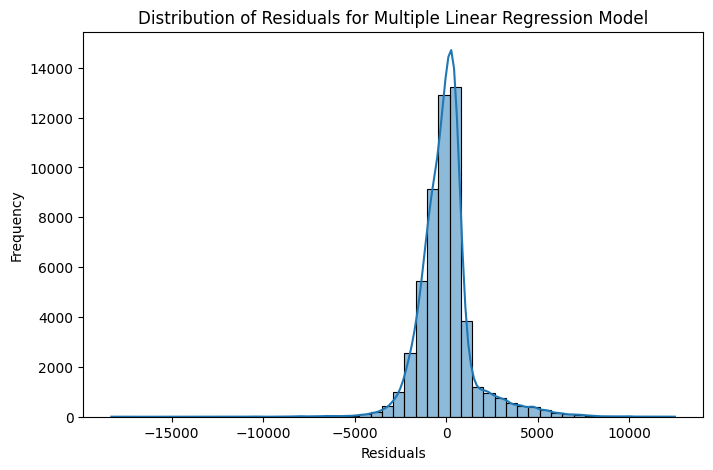

In [1]:
#1. 1. Write a Python script to visualize the distribution of errors (residuals) for a multiple linear regression model
#using Seaborn's "diamonds" dataset.
#Ans-
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

diamonds = sns.load_dataset("diamonds")

X = diamonds[['carat', 'depth', 'table']]
y = diamonds['price']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

residuals = y - y_pred

plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=50, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals for Multiple Linear Regression Model")
plt.show()


In [2]:
#2. Write a Python script to calculate and print Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root
#Mean Squared Error (RMSE) for a linear regression model.
#Ans-
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 5, 4, 5])

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Squared Error (MSE): 0.47999999999999987
Mean Absolute Error (MAE): 0.6399999999999999
Root Mean Squared Error (RMSE): 0.6928203230275508


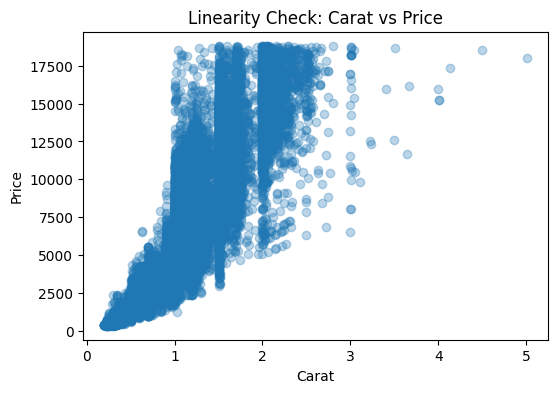

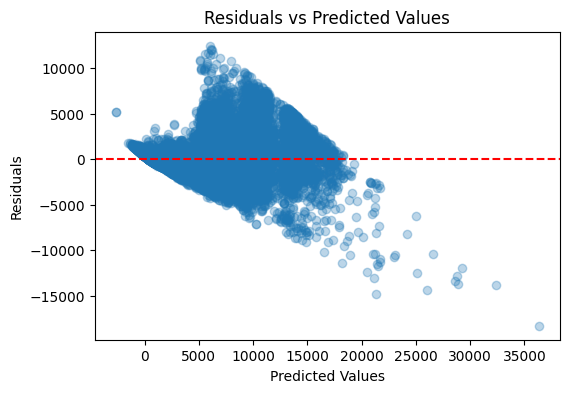

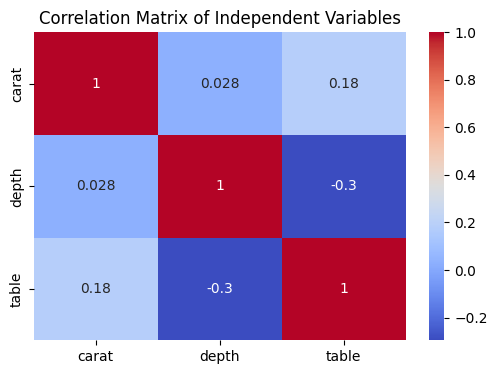

In [3]:
#3. . Write a Python script to check if the assumptions of linear regression are met. Use a scatter plot to check
#linearity, residuals plot for homoscedasticity, and correlation matrix for multicollinearity.
#Ans-
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data = sns.load_dataset("diamonds")

X = data[['carat', 'depth', 'table']]
y = data['price']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
residuals = y - y_pred

plt.figure(figsize=(6, 4))
plt.scatter(X['carat'], y, alpha=0.3)
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title("Linearity Check: Carat vs Price")
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

corr_matrix = X.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Independent Variables")
plt.show()


In [4]:
#4.  Write a Python script that creates a machine learning pipeline with feature scaling and evaluates the
#performance of different regression models
#Ans-
# Import required libraries
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


data = sns.load_dataset("diamonds")
X = data[['carat', 'depth', 'table']]
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(random_state=42)
}

for name, model in models.items():

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', model)
    ])

    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"\n{name}")
    print("MSE :", mse)
    print("MAE :", mae)
    print("RMSE:", rmse)
    print("R²  :", r2)





Linear Regression
MSE : 2333883.1792799835
MAE : 994.7366650922023
RMSE: 1527.7052003838908
R²  : 0.853185544894256

Ridge Regression
MSE : 2333877.17476568
MAE : 994.7174853101712
RMSE: 1527.703235175497
R²  : 0.8531859226121741

Lasso Regression
MSE : 2333873.191025648
MAE : 994.7062744367059
RMSE: 1527.7019313418596
R²  : 0.8531861732119588

Decision Tree
MSE : 2811509.1956681185
MAE : 880.0262641070013
RMSE: 1676.755556325405
R²  : 0.8231401664610543


In [5]:
#5.  Implement a simple linear regression model on a dataset and print the model's coefficients, intercept, and
#R-squared score.
#Ans-
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# X = independent variable
# y = dependent variable
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([2, 4, 5, 4, 5])

model = LinearRegression()

model.fit(X, y)

y_pred = model.predict(X)

print("Coefficient (Slope):", model.coef_[0])
print("Intercept:", model.intercept_)

r2 = r2_score(y, y_pred)
print("R-squared (R²) Score:", r2)


Coefficient (Slope): 0.6
Intercept: 2.2
R-squared (R²) Score: 0.6000000000000001


Slope (Coefficient): 0.10502451738435337
Intercept: 0.9202696135546731
R-squared (R²) Score: 0.45661658635167657


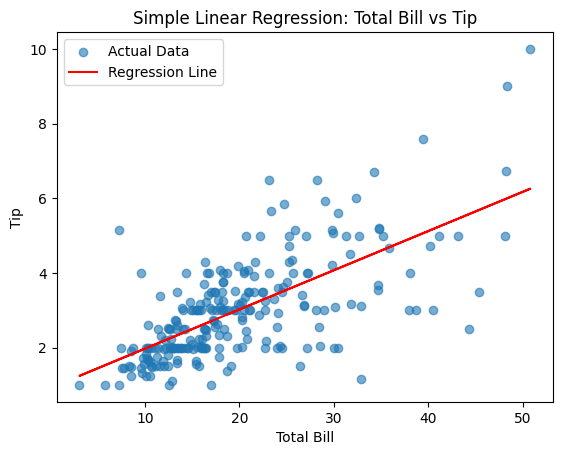

In [6]:
#6. Write a Python script that analyzes the relationship between total bill and tip in the 'tips' dataset using
#simple linear regression and visualizes the results.
#Ans-
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# Load the tips dataset
tips = sns.load_dataset("tips")

# Independent variable (X) and dependent variable (y)
X = tips[['total_bill']]
y = tips['tip']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

print("Slope (Coefficient):", model.coef_[0])
print("Intercept:", model.intercept_)
print("R-squared (R²) Score:", r2_score(y, y_pred))

plt.scatter(tips['total_bill'], tips['tip'], alpha=0.6, label="Actual Data")
plt.plot(tips['total_bill'], y_pred, color='red', label="Regression Line")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Simple Linear Regression: Total Bill vs Tip")
plt.legend()
plt.show()


Coefficient (Slope): 2.1216539219859096
Intercept: 6.549133267186791
Predictions for new X values:
X = 12, Predicted y = 32.01
X = 14, Predicted y = 36.25
X = 16, Predicted y = 40.50


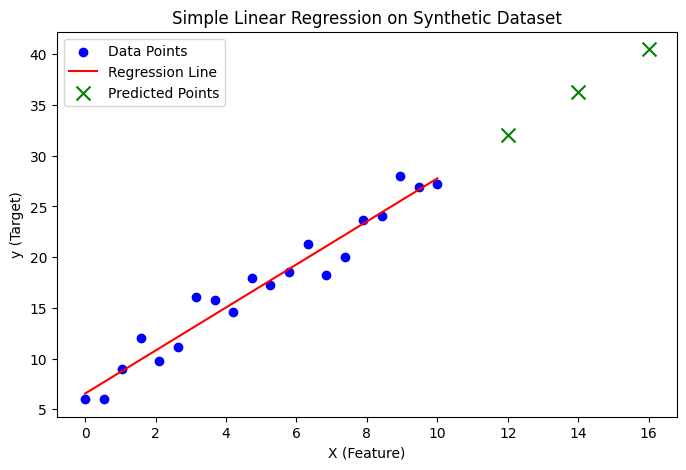

In [7]:
#7. Write a Python script that fits a linear regression model to a synthetic dataset with one feature. Use the
#model to predict new values and plot the data points along with the regression line.
#Ans-
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

np.random.seed(42)

# One feature (X) and target (y)
X = np.linspace(0, 10, 20).reshape(-1, 1)
y = 2.5 * X.flatten() + 5 + np.random.normal(0, 2, size=len(X))

model = LinearRegression()
model.fit(X, y)

X_new = np.array([[12], [14], [16]])
y_new_pred = model.predict(X_new)

print("Coefficient (Slope):", model.coef_[0])
print("Intercept:", model.intercept_)
print("Predictions for new X values:")
for x_val, y_val in zip(X_new.flatten(), y_new_pred):
    print(f"X = {x_val}, Predicted y = {y_val:.2f}")

plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.scatter(X_new, y_new_pred, color='green', marker='x', s=100, label='Predicted Points')
plt.xlabel("X (Feature)")
plt.ylabel("y (Target)")
plt.title("Simple Linear Regression on Synthetic Dataset")
plt.legend()
plt.show()


In [8]:
#8.  Write a Python script that pickles a trained linear regression model and saves it to a file.
#Ans-
import numpy as np
import pickle
from sklearn.linear_model import LinearRegression

X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 5, 4, 5])

model = LinearRegression()
model.fit(X, y)
with open("linear_regression_model.pkl", "wb") as file:
    pickle.dump(model, file)

print("Linear Regression model saved successfully!")


Linear Regression model saved successfully!


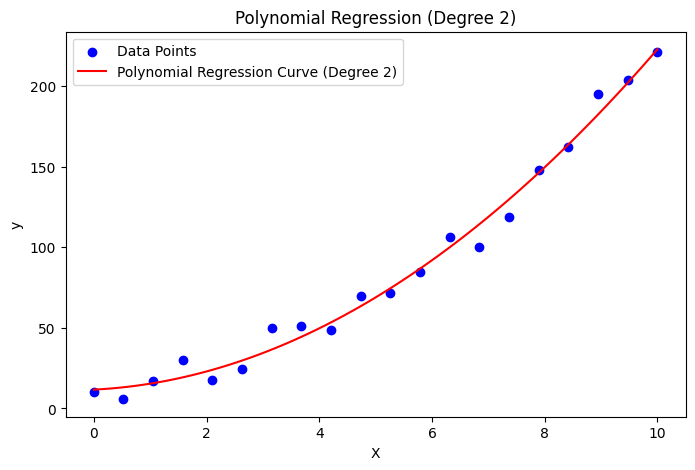

In [9]:
#9. Write a Python script that fits a polynomial regression model (degree 2) to a dataset and plots the
#regression curve
#Ans-
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

np.random.seed(42)

X = np.linspace(0, 10, 20).reshape(-1, 1)
y = 2 * X.flatten()**2 + 3 * X.flatten() + 5 + np.random.normal(0, 10, size=len(X))

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

X_smooth = np.linspace(0, 10, 100).reshape(-1, 1)
X_smooth_poly = poly.transform(X_smooth)
y_smooth_pred = model.predict(X_smooth_poly)

plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X_smooth, y_smooth_pred, color='red', label='Polynomial Regression Curve (Degree 2)')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Polynomial Regression (Degree 2)")
plt.legend()
plt.show()


In [10]:
#10. Generate synthetic data for simple linear regression (use random values for X and y) and fit a linear
#regression model to the data. Print the model's coefficient and intercept.
#Ans-
import numpy as np
from sklearn.linear_model import LinearRegression

np.random.seed(42)

# Independent variable (X)
X = np.random.rand(20, 1) * 10

# Dependent variable (y) with noise
y = 3 * X.flatten() + 7 + np.random.randn(20) * 2

model = LinearRegression()
model.fit(X, y)

print("Coefficient (Slope):", model.coef_[0])
print("Intercept:", model.intercept_)


Coefficient (Slope): 2.8966930533135304
Intercept: 6.927210006000616


In [11]:
#11. . Write a Python script that fits polynomial regression models of different degrees to a synthetic dataset and
#compares their performance.
#Ans-
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = np.linspace(0, 10, 50).reshape(-1, 1)
y = 2 * X.flatten()**2 + 3 * X.flatten() + 5 + np.random.normal(0, 10, size=len(X))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Polynomial degrees to test
degrees = [1, 2, 3, 5]

# Store results
results = {}

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)

    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_pred = model.predict(X_test_poly)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[degree] = (mse, r2)

print("Polynomial Regression Performance Comparison\n")
print("Degree | MSE        | R² Score")
print("---------------------------------")
for degree, (mse, r2) in results.items():
    print(f"{degree:^6} | {mse:<10.2f} | {r2:.3f}")


Polynomial Regression Performance Comparison

Degree | MSE        | R² Score
---------------------------------
  1    | 428.10     | 0.908
  2    | 80.78      | 0.983
  3    | 81.62      | 0.982
  5    | 84.47      | 0.982


In [12]:
#12. Write a Python script that fits a simple linear regression model with two features and prints the model's
#coefficients, intercept, and R-squared score.
#Ans-
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Two features (X1, X2)
X = np.array([
    [1, 2],
    [2, 3],
    [3, 4],
    [4, 5],
    [5, 6]
])

# Target variable (y)
y = np.array([5, 7, 9, 11, 13])

model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R-squared (R²) Score:", r2_score(y, y_pred))


Coefficients: [1. 1.]
Intercept: 2.0
R-squared (R²) Score: 1.0


Coefficient (Slope): 2.7961898978890076
Intercept: 5.6427567188528815


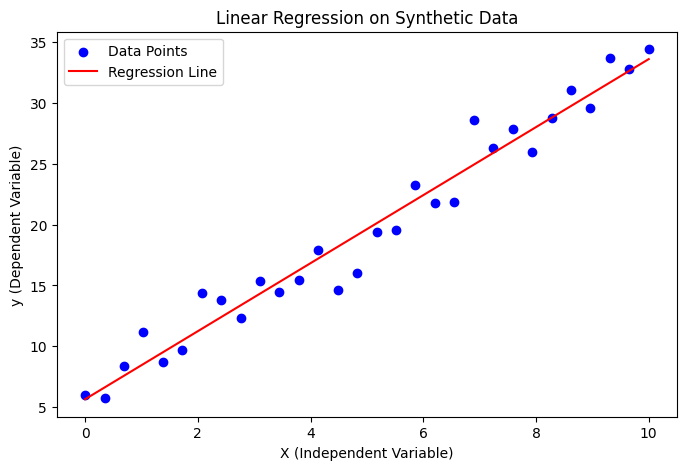

In [13]:
#13. Write a Python script that generates synthetic data, fits a linear regression model, and visualizes the
#regression line along with the data points.
#Ans-
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

np.random.seed(42)

# Independent variable
X = np.linspace(0, 10, 30).reshape(-1, 1)

# Dependent variable with noise
y = 3 * X.flatten() + 5 + np.random.normal(0, 2, size=len(X))

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

print("Coefficient (Slope):", model.coef_[0])
print("Intercept:", model.intercept_)


plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel("X (Independent Variable)")
plt.ylabel("y (Dependent Variable)")
plt.title("Linear Regression on Synthetic Data")
plt.legend()
plt.show()


In [14]:
#14.  Write a Python script that uses the Variance Inflation Factor (VIF) to check for multicollinearity in a dataset
#with multiple features.
#Ans-
import pandas as pd
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

data = sns.load_dataset("diamonds")

# Select numerical features
X = data[['carat', 'depth', 'table']]

X_const = add_constant(X)

vif_data = pd.DataFrame()
vif_data["Feature"] = X_const.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_const.values, i)
    for i in range(X_const.shape[1])
]

print(vif_data)


  Feature          VIF
0   const  3539.323665
1   carat     1.042039
2   depth     1.104275
3   table     1.141032


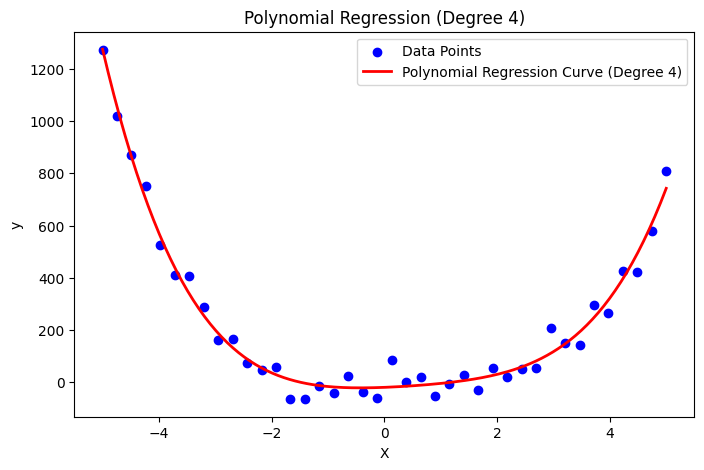

In [15]:
#15. Write a Python script that generates synthetic data for a polynomial relationship (degree 4), fits a
#polynomial regression model, and plots the regression curve.
#Ans-
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

np.random.seed(42)

X = np.linspace(-5, 5, 40).reshape(-1, 1)

# Degree-4 polynomial relationship with noise
y = (
    1.5 * X.flatten()**4
    - 2 * X.flatten()**3
    + 3 * X.flatten()**2
    + 5 * X.flatten()
    + 10
    + np.random.normal(0, 50, size=len(X))
)

poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

X_smooth = np.linspace(-5, 5, 200).reshape(-1, 1)
X_smooth_poly = poly.transform(X_smooth)
y_smooth_pred = model.predict(X_smooth_poly)


plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X_smooth, y_smooth_pred, color='red', linewidth=2,
         label='Polynomial Regression Curve (Degree 4)')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Polynomial Regression (Degree 4)")
plt.legend()
plt.show()


In [16]:
#16.  Write a Python script that creates a machine learning pipeline with data standardization and a multiple
#linear regression model, and prints the R-squared score.
#Ans-
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Two features (X1, X2)
np.random.seed(42)

X = np.random.rand(100, 2) * 10
y = 3 * X[:, 0] + 2 * X[:, 1] + 5 + np.random.normal(0, 2, 100)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("R-squared (R²) Score:", r2)


R-squared (R²) Score: 0.9611277038272864


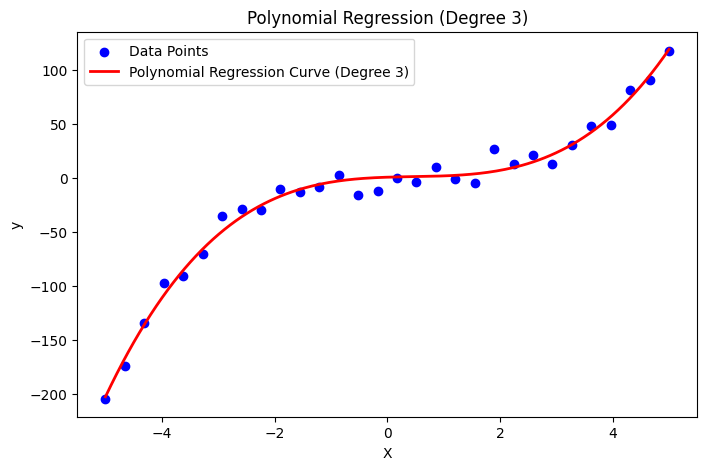

In [17]:
#17. Write a Python script that performs polynomial regression (degree 3) on a synthetic dataset and plots the
#regression curve.
#Ans-
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

np.random.seed(42)

X = np.linspace(-5, 5, 30).reshape(-1, 1)

# Degree-3 polynomial relationship with noise
y = (
    1.2 * X.flatten()**3
    - 2 * X.flatten()**2
    + 3 * X.flatten()
    + 5
    + np.random.normal(0, 10, size=len(X))
)

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

X_smooth = np.linspace(-5, 5, 200).reshape(-1, 1)
X_smooth_poly = poly.transform(X_smooth)
y_smooth_pred = model.predict(X_smooth_poly)

plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X_smooth, y_smooth_pred, color='red', linewidth=2,
         label='Polynomial Regression Curve (Degree 3)')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Polynomial Regression (Degree 3)")
plt.legend()
plt.show()


In [18]:
#18. Write a Python script that performs multiple linear regression on a synthetic dataset with 5 features. Print
#the R-squared score and model coefficients.
#Ans-
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

np.random.seed(42)

# 100 samples, 5 features
X = np.random.rand(100, 5)

# True relationship (known coefficients)
true_coefficients = np.array([2.5, -1.8, 3.0, 0.5, 4.2])

# Target variable with noise
y = X @ true_coefficients + 5 + np.random.normal(0, 0.5, 100)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# R-squared score
r2 = r2_score(y_test, y_pred)

print("R-squared (R²) Score:", r2)
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


R-squared (R²) Score: 0.9152541804533997
Model Coefficients: [ 2.32647934 -1.91696166  3.32395165  0.5727923   3.97717992]
Intercept: 5.072992371993497


Coefficient (Slope): 3.6942848468335123
Intercept: 6.96413507827933


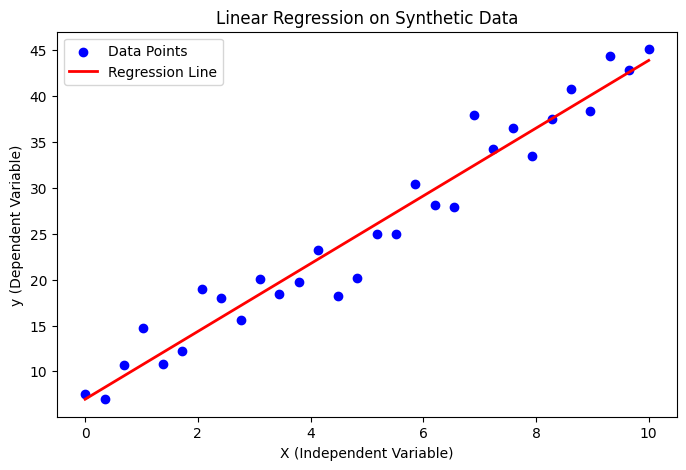

In [19]:
#19. Write a Python script that generates synthetic data for linear regression, fits a model, and visualizes the
# data points along with the regression line
#ANs-
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
np.random.seed(42)

# Independent variable (X)
X = np.linspace(0, 10, 30).reshape(-1, 1)

# Dependent variable (y) with noise
y = 4 * X.flatten() + 6 + np.random.normal(0, 3, size=len(X))

model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Print model parameters
print("Coefficient (Slope):", model.coef_[0])
print("Intercept:", model.intercept_)

plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel("X (Independent Variable)")
plt.ylabel("y (Dependent Variable)")
plt.title("Linear Regression on Synthetic Data")
plt.legend()
plt.show()


In [20]:
#20.Create a synthetic dataset with 3 features and perform multiple linear regression. Print the model's Rsquared score and coefficients.
#Ans-
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

np.random.seed(42)

# 100 samples, 3 features
X = np.random.rand(100, 3)

# True coefficients
true_coefficients = np.array([2.0, -3.5, 4.0])

# Target variable with noise
y = X @ true_coefficients + 5 + np.random.normal(0, 0.5, 100)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

print("R-squared (R²) Score:", r2_score(y_test, y_pred))
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


R-squared (R²) Score: 0.8151826385841713
Model Coefficients: [ 2.05294884 -3.537697    4.34302962]
Intercept: 4.9574947791835395


In [21]:
#21.  Write a Python script that demonstrates how to serialize and deserialize machine learning models using
#joblib instead of pickling.
#Ans-
import numpy as np
import joblib
from sklearn.linear_model import LinearRegression

X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 5, 4, 5])
model = LinearRegression()
model.fit(X, y)

joblib.dump(model, "linear_regression_model.joblib")
print("Model saved using joblib.")

loaded_model = joblib.load("linear_regression_model.joblib")
print("Model loaded successfully.")

prediction = loaded_model.predict([[6]])
print("Prediction for X = 6:", prediction[0])


Model saved using joblib.
Model loaded successfully.
Prediction for X = 6: 5.8


In [23]:
#22. Write a Python script to perform linear regression with categorical features using one-hot encoding. Use
#the Seaborn 'tips' dataset.
#Ans-
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


tips = sns.load_dataset("tips")


X = tips[['total_bill', 'sex', 'smoker', 'day', 'time']]
y = tips['tip']

X_encoded = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R-squared (R²) Score:", r2_score(y_test, y_pred))
print("\nModel Coefficients:")
for feature, coef in zip(X_encoded.columns, model.coef_):
    print(f"{feature}: {coef}")
print("\nIntercept:", model.intercept_)


R-squared (R²) Score: 0.47735804203610954

Model Coefficients:
total_bill: 0.10926219695475822
sex_Female: -0.02285671701538572
smoker_No: 0.2589746904486461
day_Fri: 0.1917249424578652
day_Sat: 0.06809229365625336
day_Sun: 0.2581795381976479
time_Dinner: -0.18641624022603345

Intercept: 0.7411944370422616


In [24]:
#23. Compare Ridge Regression with Linear Regression on a synthetic dataset and print the coefficients and Rsquared score.
#Ans-
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

np.random.seed(42)

# 100 samples, 4 features
X = np.random.rand(100, 4)

# True coefficients
true_coeffs = np.array([5, 3, 0.5, 0.1])

y = X @ true_coeffs + np.random.normal(0, 1, 100)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

print("Coefficients:", lr.coef_)
print("R-squared (R²):", r2_score(y_test, y_pred_lr))

print("\nRidge Regression")
print("Coefficients:", ridge.coef_)
print("R-squared (R²):", r2_score(y_test, y_pred_ridge))


Coefficients: [ 5.53137571  2.31846419  0.69937087 -0.13047815]
R-squared (R²): 0.7596715192946779

Ridge Regression
Coefficients: [ 4.90911274  2.03456633  0.64698547 -0.04714791]
R-squared (R²): 0.7584098499882744


In [25]:
#24. Write a Python script that uses cross-validation to evaluate a Linear Regression model on a synthetic
#dataset.
#Ans-
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

np.random.seed(42)

X = np.random.rand(100, 1) * 10
y = 3 * X.flatten() + 5 + np.random.normal(0, 2, 100)

model = LinearRegression()

cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print("Cross-validation R² scores:", cv_scores)
print("Average R² score:", cv_scores.mean())


Cross-validation R² scores: [0.96596562 0.94967958 0.95056064 0.96544932 0.94279384]
Average R² score: 0.9548897987448408


In [26]:
#25. Write a Python script that compares polynomial regression models of different degrees and prints the Rsquared score for each.
#Ans-
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

np.random.seed(42)

X = np.linspace(0, 10, 60).reshape(-1, 1)
y = 2 * X.flatten()**2 + 3 * X.flatten() + 5 + np.random.normal(0, 10, size=len(X))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

degrees = [1, 2, 3, 5]

print("Polynomial Regression Comparison (R² Scores)\n")

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)

    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_pred = model.predict(X_test_poly)
    r2 = r2_score(y_test, y_pred)

    print(f"Degree {degree}: R² Score = {r2:.3f}")


Polynomial Regression Comparison (R² Scores)

Degree 1: R² Score = 0.908
Degree 2: R² Score = 0.983
Degree 3: R² Score = 0.983
Degree 5: R² Score = 0.984
